# Большое ДЗ №1

Выполните задания, указанные в конце ноутбука. Критерий зачета ДЗ - не менее 70% набранных баллов (балы указаны в каждом задании).

# Загрузим датасет - зарплаты IT специалистов в Европе за 2020 год

In [1]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_to_data = 'https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_1/data/IT_EU_2020.csv'
df_2020 = pd.read_csv(path_to_data)
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [3]:
# look at an example of a messy "numerical" columns
df_2020['Number of vacation days'].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
22                                                8
32                                                8
31                                                8
36                                                5
35                                                5
23                                                4
40                                                4
0                                                 4
33                                                3
unlimited                                         3
45          

In [4]:
np.unique(df_2020['Number of vacation days'].dropna())

array(['(no idea)', '0', '1', '10', '12', '14', '15', '16', '20', '21',
       '22', '23', '23+', '24', '24 labour days', '25', '26', '27', '28',
       '29', '3', '30', '30 in contract (but theoretically unlimited)',
       '31', '32', '33', '34', '35', '36', '365', '37', '37.5', '38',
       '39', '40', '45', '5', '50', '60', '99', 'Unlimited', 'Unlimited ',
       'unlimited', 'unlimited ', '~25'], dtype=object)

In [5]:
# Выведем размер датасета
df_2020.shape

(1253, 23)

In [6]:
# show all columns
print(df_2020.columns)

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [7]:
# rename columns
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [8]:
# Проверим NaN значения
df_2020.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [9]:
df_2020.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


**Вопрос:** Почему вывелась статистика не по всем колонкам?

**Ответ:** Статистика выводится по тем колонкам, в которых есть только числовые данные.

In [10]:
# categorical features
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [11]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR']

In [12]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country',
                     'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [13]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

0

## Очистка данных

In [14]:
# fill missing values

# categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

## Посмотрим простые статистики

1. Возраст людей

In [15]:
%matplotlib inline

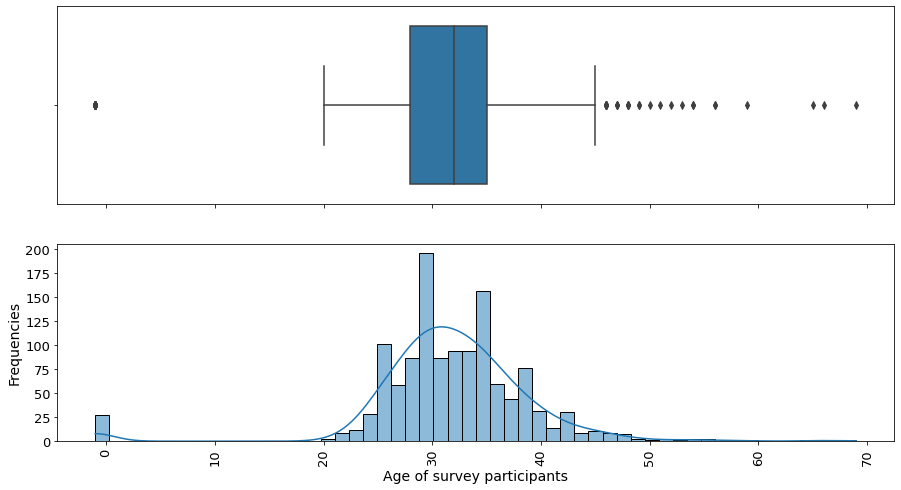

In [16]:
# Age of survey participants distribution
fig, (ax_box,ax_hist) = plt.subplots(2, sharex=True,figsize=(15,8))

sns.boxplot(data=df_2020,x='Age',ax=ax_box)
ax_box.set(xlabel="")


sns.histplot(data=df_2020,x='Age',kde=True,ax=ax_hist)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

Используем другой тип графика

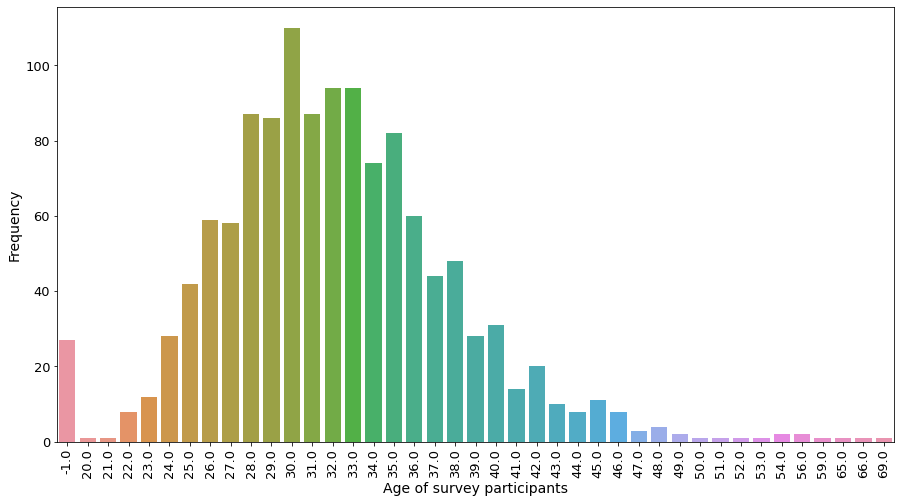

In [17]:
# count plot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_2020,x='Age')



plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.show()

2. Посмотрим какие города встречаются в датасете

In [18]:
current_feature = 'City'
# show all levels
print(np.unique(df_2020[current_feature]))

['Aachen' 'Amsterdam' 'Ansbach' 'Barcelona' 'Basel' 'Berlin' 'Bielefeld'
 'Bodensee' 'Boeblingen' 'Bonn' 'Braunschweig ' 'Brunswick' 'Brussels'
 'Brussels ' 'Bucharest' 'Bölingen' 'Cambridge' 'City in Russia' 'Cologne'
 'Copenhagen' 'Cracovia' 'Cracow' 'Cupertino' 'Darmstadt' 'Den Haag'
 'Dortmund' 'Dresden' 'Dublin' 'Dublin ' 'Duesseldorf' 'Dusseldorf'
 'Dusseldurf' 'Düsseldorf' 'Düsseldorf ' 'Eindhoven' 'Erlangen' 'Fr'
 'France' 'Frankfurt' 'Friedrichshafen' 'Hamburg' 'Hannover' 'Heidelberg'
 'Heidelberg ' 'Heilbronn' 'Helsinki' 'Hildesheim' 'Hildesheim '
 'Ingolstadt' 'Ingolstadt ' 'Innsbruck' 'Istanbul' 'Jena' 'Karlsruhe'
 'Karlsruhe ' 'Kempten' 'Kiev' 'Koblenz' 'Konstanz' 'Konstanz area'
 'Krakow' 'Kyiv' 'Köln' 'Leipzig' 'Lisbon' 'London' 'Luttich' 'Lübeck'
 'Madrid' 'Malta' 'Mannheim' 'Mannheim ' 'Marseille' 'Milan' 'Milano'
 'Minsk' 'Moldova' 'Moscow' 'Munich' 'Murnau am Staffelsee ' 'Münster'
 'NJ, USA' 'Nuremberg' 'Nuremberg ' 'Nürnberg' 'Paderborn' 'Paris'
 'Prague' 'Prefer n

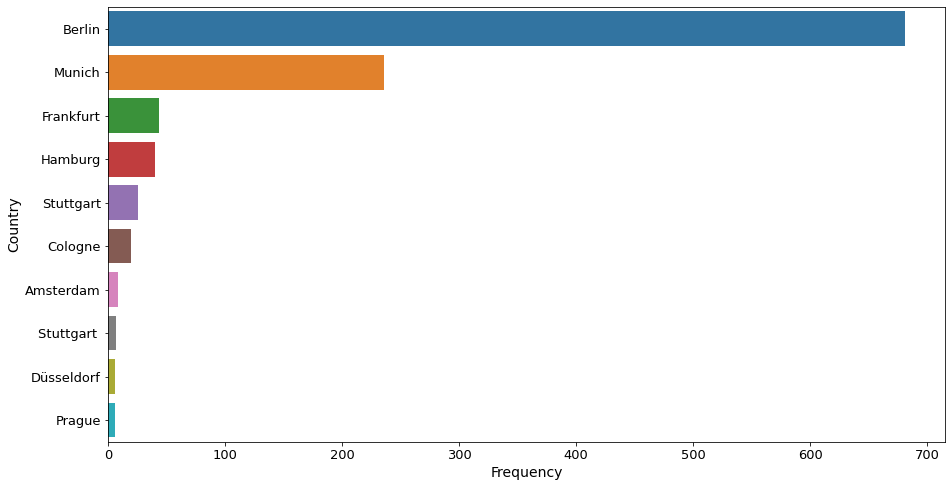

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_2020['City'].value_counts().head(10).reset_index(),
        y='index',x='City')
plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Country",fontsize=14)
plt.show()

## Рассмотрим самый интересный параметр - **Yearly brutto salary (without bonus and stocks) in EUR**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


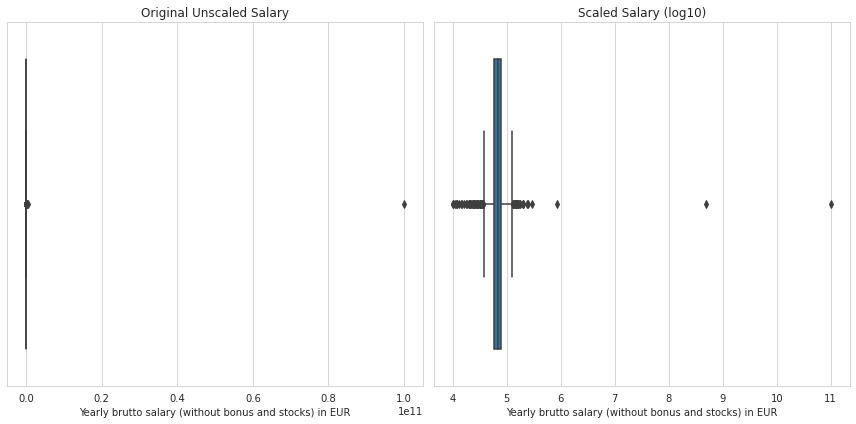

In [20]:
interested_feature = df_2020['Yearly brutto salary (without bonus and stocks) in EUR']

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))

# Original Data
plt.subplot(1,2,1)
sns.boxplot(interested_feature)
plt.title("Original Unscaled Salary")

# After Scaling down using Logarithms
plt.subplot(1,2,2)
sns.boxplot(np.log10(interested_feature))
plt.title("Scaled Salary (log10)")

plt.tight_layout()
plt.show()

**Вопрос:** Почему ничего не понятно на графиках?

**Ответ:** Потому-что размерности 10 в степени 11, надо убирать выбросы либо логарифмировать данные.

In [21]:
# Removing Outlier using IQR

feature = 'Yearly brutto salary (without bonus and stocks) in EUR'

p25 = df_2020[feature].quantile(0.25) 
p75 = df_2020[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = df_2020[(df_2020[feature] > lower_limit) & (df_2020[feature] < upper_limit)].copy()

# Checking the difference
diff = df_2020.shape[0] - new_df.shape[0] 

diff

82

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


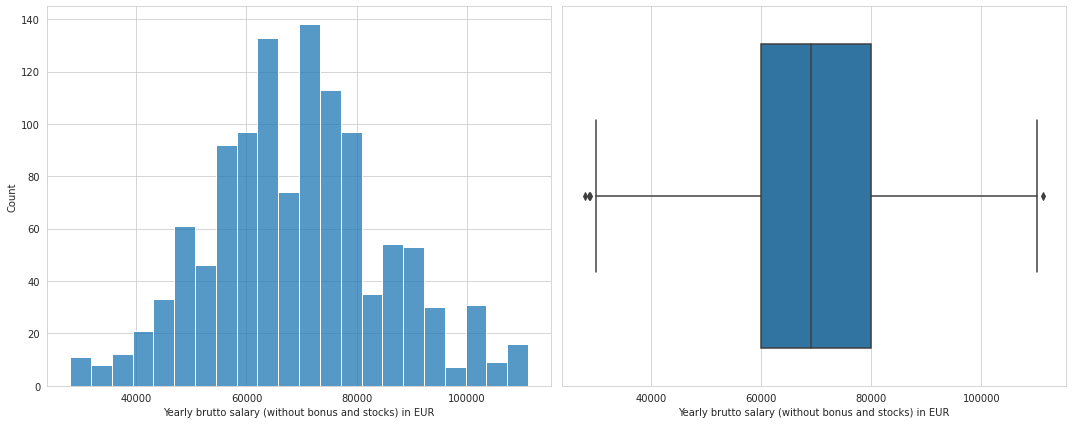

In [22]:
# Distribution after removing outlier from the dataset

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df[feature], ax=ax1)
sns.boxplot(new_df[feature],ax=ax2)

plt.tight_layout()
plt.show()

## Связи между фичами

In [23]:
# Exploring the Gender Column
feature = 'Gender'
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

In [24]:
# Replacing the NaN value with string "Not Specified"
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

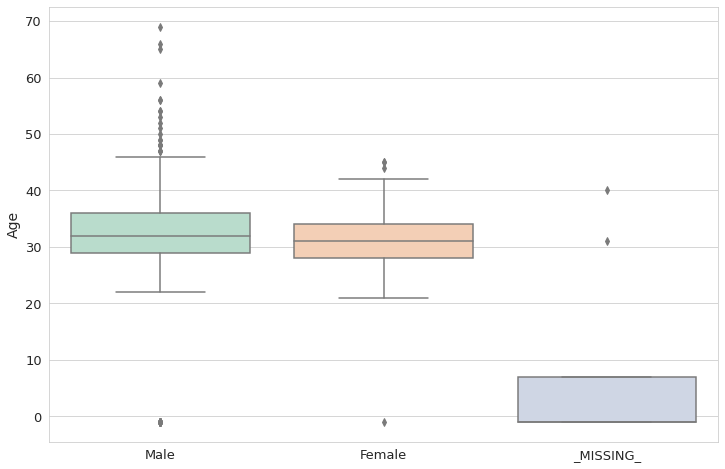

In [25]:
# Plotting the Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Age',data=new_df,palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:154: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f8619cac0d0> has a label of '_MISSING_' which cannot be automatically added to the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


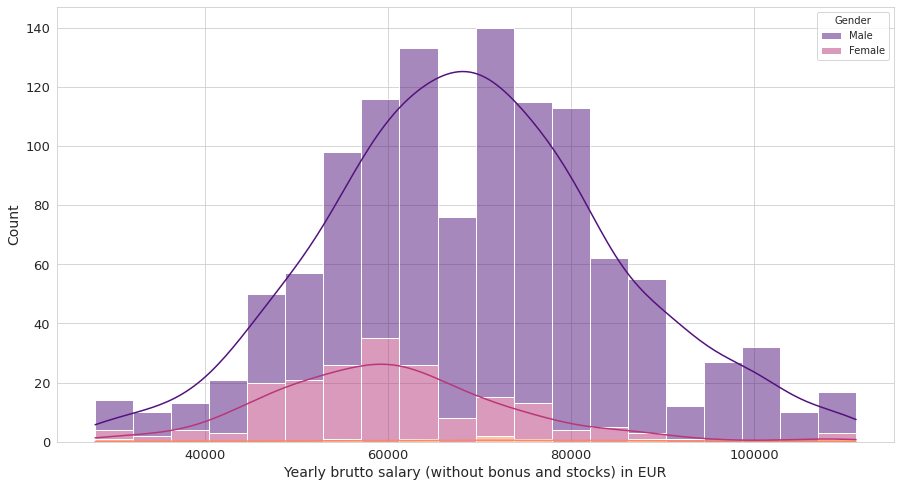

In [26]:
# Distribution of Yearly Salaries 
plt.figure(figsize=(15,8))
sns.histplot(x='Yearly brutto salary (without bonus and stocks) in EUR',data=new_df,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

## Рассмотрим должности

In [27]:
new_df['Position'].value_counts()

Software Engineer                             365
Backend Developer                             161
Data Scientist                                102
Frontend Developer                             86
QA Engineer                                    69
                                             ... 
Student, Software Developer, Data Engineer      1
Data Center Manager                             1
Staff Engineer                                  1
IT Operations Manager                           1
Technical account manager                       1
Name: Position, Length: 135, dtype: int64

Отобразим кол-во позиций

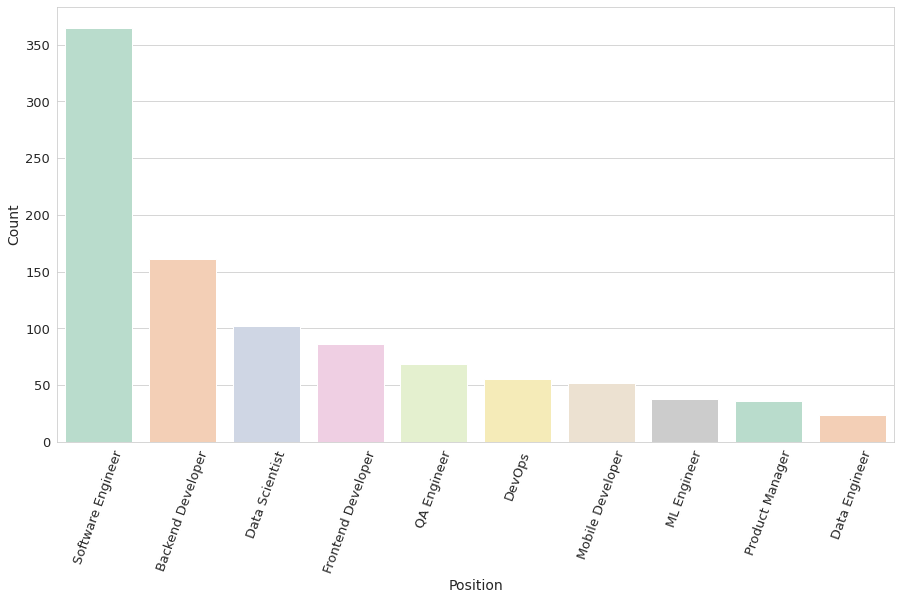

In [28]:
# Plotting the distribution - number of Positon
plt.figure(figsize=(15,8))
sns.countplot(data=new_df,x='Position',
              order=new_df['Position'].value_counts().iloc[:10].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

In [29]:
position_earning = new_df['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(new_df['Position']).sum()
position_earning.sort_values(ascending=False,inplace=True)
position_earning.head(10)

Position
Software Engineer     26047284.0
Backend Developer     11283523.0
Data Scientist         6811400.0
Frontend Developer     5609155.0
QA Engineer            4240300.0
DevOps                 4006800.0
Mobile Developer       3512400.0
ML Engineer            2554000.0
Product Manager        2454510.0
Data Engineer          1666500.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [30]:
top_position = position_earning.iloc[:10].index.to_list()
avr_earning = (position_earning/ new_df['Position'].value_counts()).sort_values(ascending = False)

for position in top_position:
    print(position,": ",round(avr_earning[position],2))

Software Engineer :  71362.42
Backend Developer :  70083.99
Data Scientist :  66778.43
Frontend Developer :  65222.73
QA Engineer :  61453.62
DevOps :  72850.91
Mobile Developer :  67546.15
ML Engineer :  67210.53
Product Manager :  68180.83
Data Engineer :  69437.5


# Задание 1 (1 балл)
Рассчитайте корреляцию Пирсона для каждого численного признака с целевой переменной (целевая переменная -'Yearly brutto salary (without bonus and stocks) in EUR')

In [31]:
# Find all correlations and sort 
correlations_data = df_2020.corr()['Yearly brutto salary (without bonus and stocks) in EUR'].sort_values()
print(correlations_data)


Age                                                                                                        -0.124956
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week          -0.044144
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    0.999998
Yearly brutto salary (without bonus and stocks) in EUR                                                      1.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64


# Задание 2 (1 балл)
Изучите данные при помощи метода ProfileReport из библиотеки pandas_profiling, установите следующие атрибуты для  ProfileReport: explorative=True, minimal=False.

Если работаете в колабе, то обязательно увыполните следующую команду (в пустой ячейке и перезапустите среду в ноутбуке ("Среда выполнения" -> "Перезапустить среду выполнения")
```
!pip3 install pandas-profiling==3.1.0
```

In [32]:
#!pip3 install pandas-profiling==3.1.0
from pandas_profiling import ProfileReport
ProfileReport(df_2020, title="Salary in Europe in 2020", explorative=True, minimal=False)

Output hidden; open in https://colab.research.google.com to view.

# Задание 3 (1 балл)
Сделайте краткий вывод по данным, основываясь на отчете ProfileReport. Какие основные проблемы в данных?

**Вывод:**
1. В колонке "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week" 70.2% пропущенных данных;
2. В ещё двух колонках "Annual bonus+stocks one year ago. Only answer if staying in same country" и "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country" большой процент пропущенных данных;
3. По какой-то причине не выводится выводы по столбцу "Yearly bonus + stocks in EUR";
4. Большие выбросы в колонке "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country";
5. В "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week" отвечали видимо 0, если ответ "No" (считаю это большим выбросом);
6. В "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR
Categorical" много пропущенных данных (видимо большенство отвечало "No") и нулевых данных;
7. Фича "Company type" имеет наибольшее количество высоких корреляций (с 9 другими фичами).

# Задание 4 (1 балл)
Расчитайте матрицу корреляций признаков. Используйте метод corr() из библиотеки pandas, а для визуализации - heatmap из библиотеки seaborn (см. пример в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW)

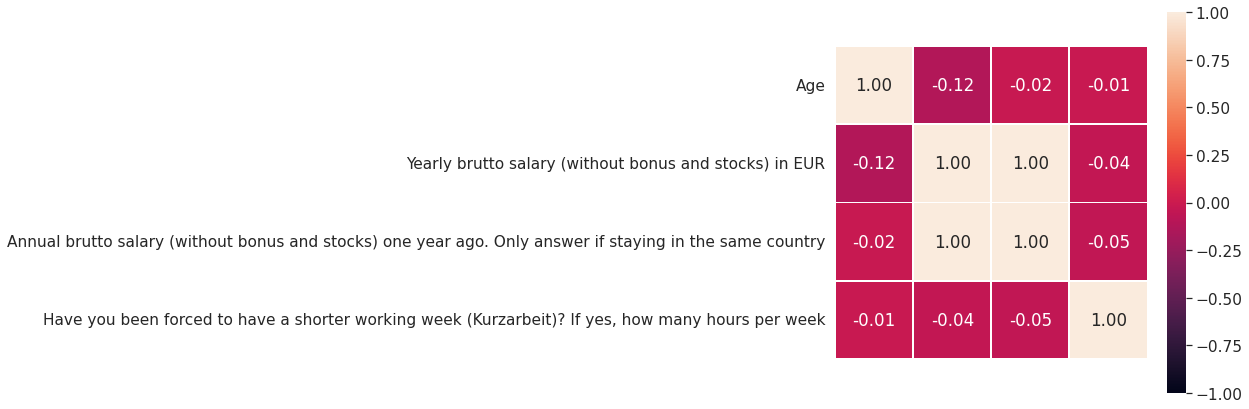

In [33]:
sns.set(font_scale=1.4)
plt.figure(figsize=(7,7))
sns.heatmap(df_2020.corr(),
            cbar=True,
            #cmap='magma', 
            annot=True, 
            fmt = ".2f",
            square=True, 
            linewidths=.9,
            xticklabels=False, 
            vmin=-1, 
            vmax=1
            )
plt.show()

# Задание 5 (1.5 балла)

Закодируйте категориальные признаки. Можете использовать любой кодировщик категориальных данных, например: `sklearn.preprocessing.LabelEncoder`,`sklearn.preprocessing.OrdinalEncoder` или`sklearn.preprocessing.OneHotEncoder`.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df_new = df_2020.copy()
cat_encoder = LabelEncoder()
for feature in features_cat:
  df_new[feature] = cat_encoder.fit_transform(df_new[feature])

# Задание 6 (1.5 балла)
После кодирования категориальных признаков в числовые - еще раз рассчитайте и отобразите матрицу корреляций. Удалите фичи, у которых корреляция >0.6 или (<-0.6). Не забывайте что отрицательная корреляция - тоже мера зависимости!

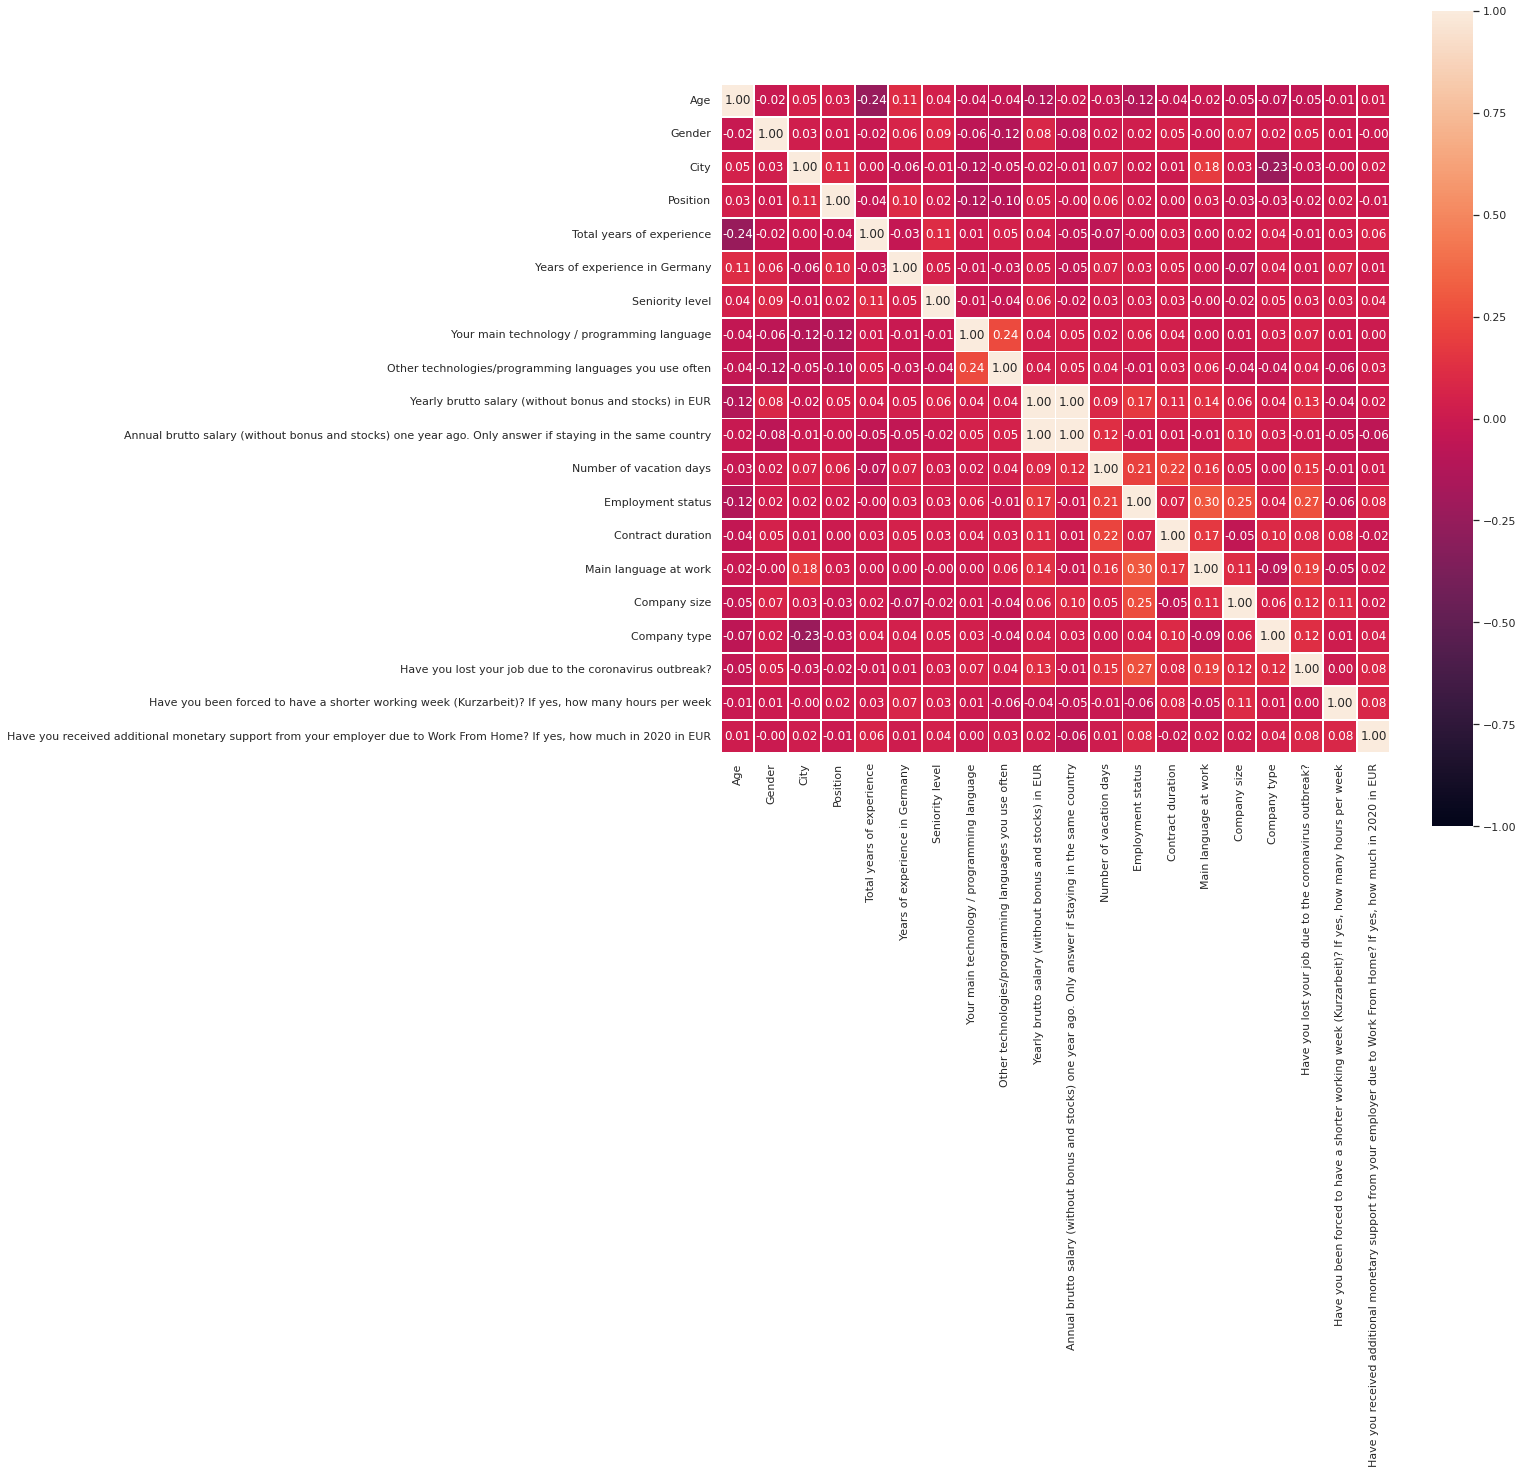

In [36]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(),
            cbar=True,
            #cmap='magma', 
            annot=True, 
            fmt = ".2f",
            square=True, 
            linewidths=.9,
            #xticklabels=False, 
            vmin=-1, 
            vmax=1
            )
plt.show()

In [37]:
#Находим колонки, в которых корреляция фич >0.6 или <-0.6
#Не учитывая корреляцию на диагонале, так как там всегда 1
A = df_new.corr()
A = A[(A>0.6) | (A < -0.6)]
np.fill_diagonal(A.values, np.nan)
A = A.dropna(how='all', axis=1)
A = list(A.columns.values.tolist())
A

['Yearly brutto salary (without bonus and stocks) in EUR',
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']

In [38]:
df_new.head(0)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"


In [39]:
#Две фичи имеют корреляцию >0.6
df_new6 = df_new.copy()
df_new6 = df_new6.drop(A, axis=1)
df_new6.head(0)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"


# Задание 7 (1.5 балла)
Приведите пример распределения признака с выбросами (можете привести любой из выборки, кроме указанного выше в ноутбуке). Удалите выбросы с использованием правила "68-95-99.7", то есть оставьте те значения, которые попадают в диапазон: среднее значение +- 3 стандартных отклонения. Пример реализации можно посмотреть в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW. Не перепутайте с примером интерквартильного размаха!

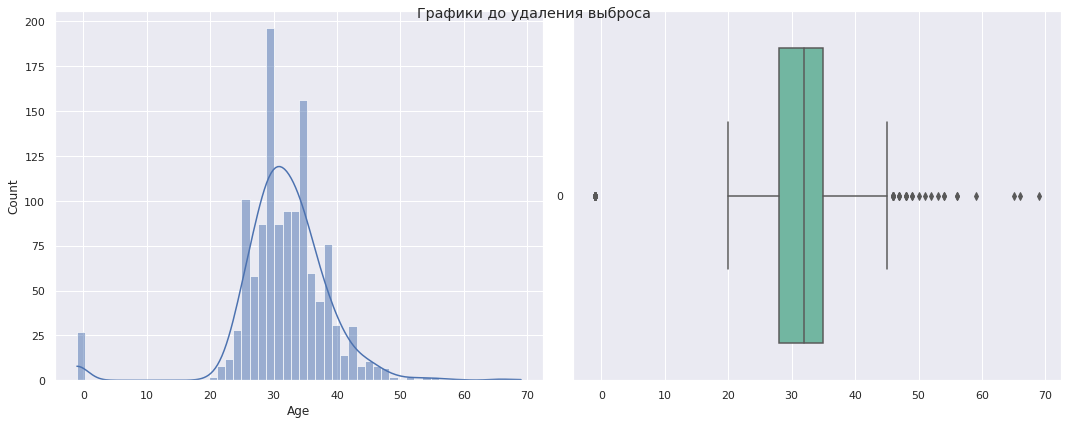

In [40]:
feature ='Age'
#Графики до удаления выброса
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=df_new6[feature], ax=ax1, kde=True)
sns.boxplot(data=df_new6[feature],ax=ax2, orient="h", palette="Set2")

plt.tight_layout()
plt.suptitle("Графики до удаления выброса")
plt.show()

In [41]:
factor = 3
upper_lim = df_new6[feature].mean () + df_new6[feature].std () * factor
lower_lim = df_new6[feature].mean () - df_new6[feature].std () * factor
df_new6 = df_new6[(df_new6[feature] < upper_lim) & (df_new6[feature] > lower_lim)]

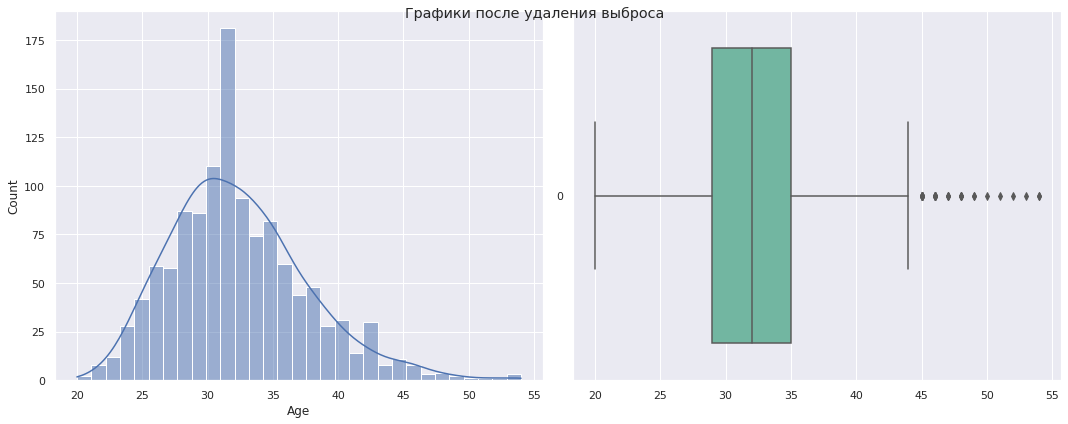

In [42]:
#Графики после удаления выброса
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=df_new6[feature], ax=ax1, kde=True)
sns.boxplot(data=df_new6[feature],ax=ax2, orient="h", palette="Set2")

plt.tight_layout()
plt.suptitle("Графики после удаления выброса")
plt.show()

# Задание 8 (1 балл)
Постройте несколько distplot (с использованием seaborn) для 3ех произвольных числовых признаков.

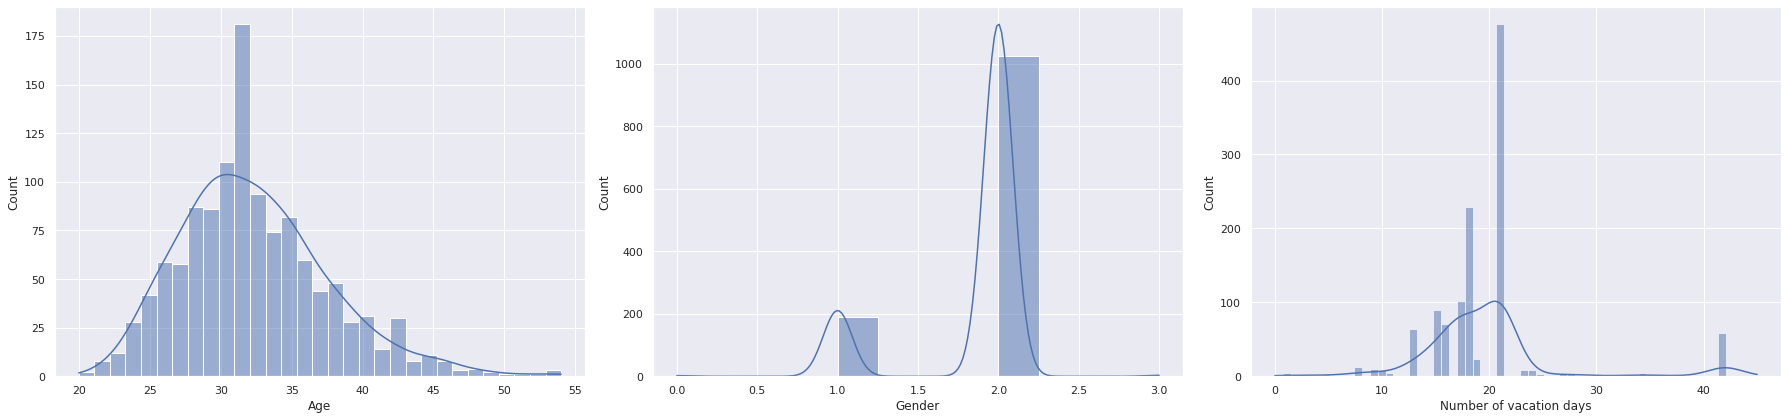

In [43]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(25,6))
sns.histplot(df_new6['Age'],ax=ax1, kde=True)
sns.histplot(df_new6['Gender'],ax=ax2, kde=True)
sns.histplot(df_new6['Number of vacation days'],ax=ax3, kde=True)
plt.tight_layout()

plt.show()

**Выводы:**
1. В основном работают молодые люди от 25 до 35, при этом много молодых людей ворзастом 29 лет;
2. Наиболее количество работников мужчины;
3. У большенства работников 23 дня отпуска.

# Задание 9 (1.5 балла)
Проведите bivariate analysis: постройте scatter plots различных фичей ( а также фичей с целей переменной). Видите ли вы какие-то зависимости? Может есть гипотезы? Постройте не менее 3ех графиков + краткие выводы по каждому.

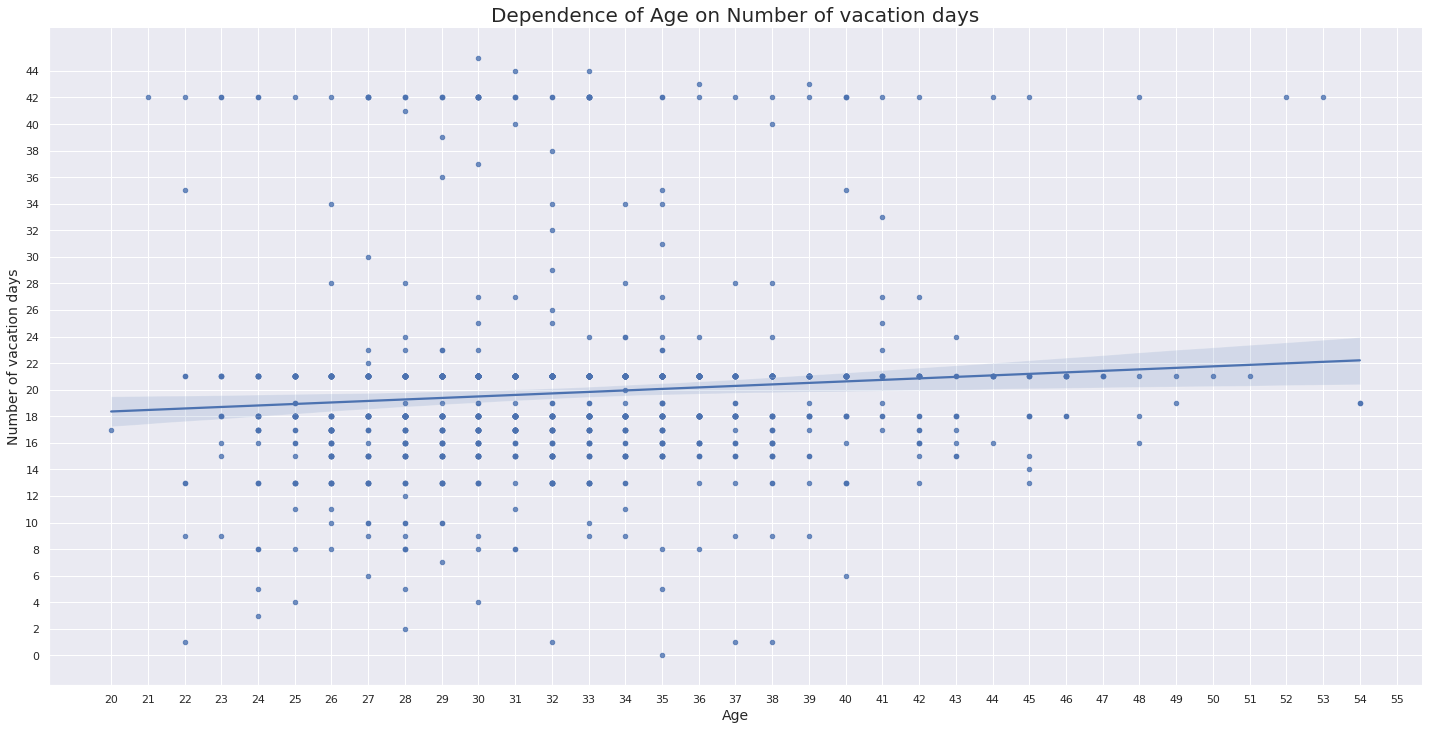

In [44]:
sns.lmplot(
    x='Age',
    y='Number of vacation days', 
    data = df_new6,
    aspect = 2, 
    height = 10,
    scatter_kws = {'alpha': 0.8, 's': 20}
    )
plt.title('Dependence of Age on Number of vacation days', size = 20)
plt.xlabel('Age', size = 14)
plt.ylabel('Number of vacation days', size = 14)
plt.xticks(range(20, 56, 1))
plt.yticks(range(0, 45, 2))
plt.show()

**Выводы:**
В среднем люди к старости отдыхают чуть больше, чем в молодости

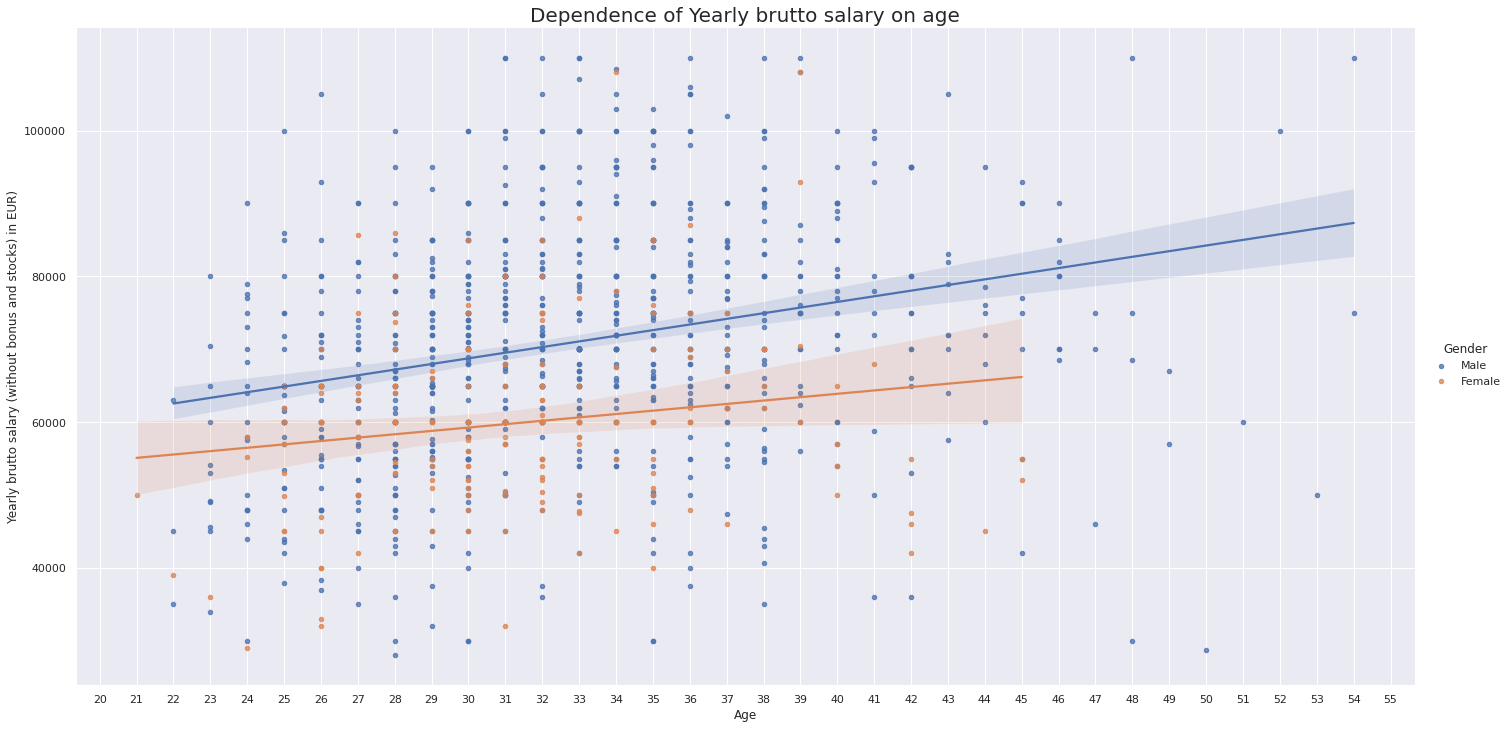

In [45]:
sns.lmplot(
    y='Yearly brutto salary (without bonus and stocks) in EUR',
    x='Age',
    data = new_df[(new_df['Age'] > 0) & (new_df['Age'] <= 55)  & (new_df['Gender'] != '_MISSING_')],
    hue='Gender', 
    aspect = 2, 
    height = 10,
    scatter_kws = {'alpha': 0.8, 's': 20},
    fit_reg = True,
    )
plt.title('Dependence of Yearly brutto salary on age', size = 20)
plt.ylabel('Yearly brutto salary (without bonus and stocks) in EUR)', size = 12)
plt.xlabel('Age', size = 12)
plt.xticks(range(20, 56, 1))
plt.show()

**Вывод:**

К сожалению, в среднем, женщины до сих пор зарабатывают меньше мужчин, а также в компании нет женщин старше 45 лет.

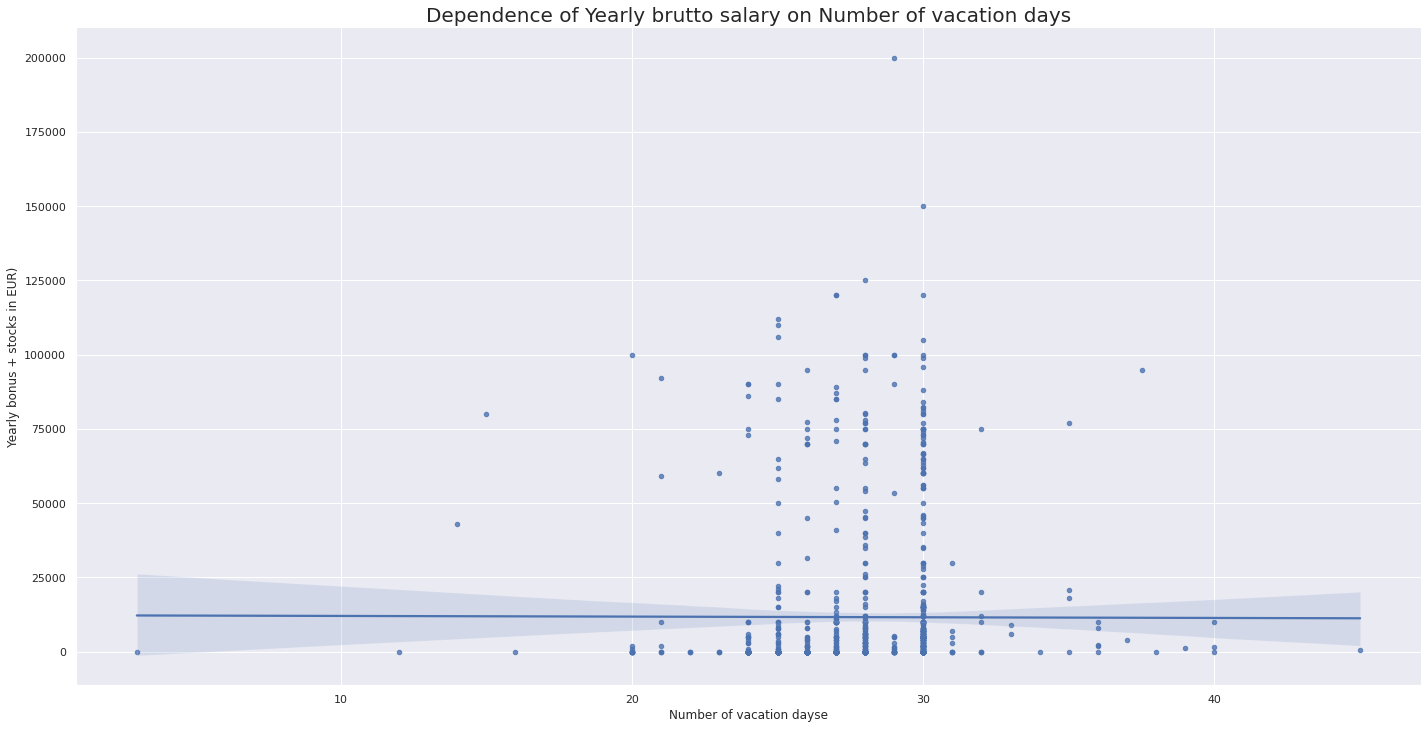

In [46]:
AA = new_df.copy()
AA['Yearly bonus + stocks in EUR'] = pd.to_numeric(AA['Yearly bonus + stocks in EUR'], errors='coerce')
AA['Number of vacation days'] = pd.to_numeric(AA['Number of vacation days'], errors='coerce')

grid = sns.lmplot(
    y='Yearly bonus + stocks in EUR',
    x='Number of vacation days',
    data = AA[(AA['Yearly bonus + stocks in EUR'] < (0.4 * (10**6))) & (AA['Number of vacation days'] < 50)], 
    aspect = 2, 
    height = 10,
    scatter_kws = {'alpha': 0.8, 's': 20},
    fit_reg = True,
    )
plt.title('Dependence of Yearly brutto salary on Number of vacation days', size = 20)
plt.ylabel('Yearly bonus + stocks in EUR)', size = 12)
plt.xlabel('Number of vacation dayse', size = 12)
#plt.xticks(range(20, 56, 1))
#plt.yticks(range(0, 1000000000, 100000000))
#grid.set(yscale="log")
plt.show()


**Вывод:**

(Было очень сложно придумать третий график)

Как можно заметить, дни отпуска особо не зависят от годовой зарплаты.

# Дополнительной задание (необязательно)
Здесь Вы можете выдвинуть различные гипотезы относительно данных: опровергнуть их, подтвердить, ну или хотя бы просто перечислить. Построить дополнительные графики, изменить логику преобразования данных (например, метода заполнения пустых значений), и провести любые другие манипуляции с данными, ведь анализ данных - это чистое творчество!